In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from livelossplot import PlotLossesKerasTF

# Plot sample images for all the classes 

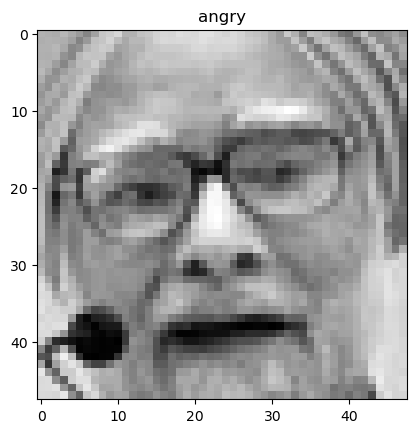

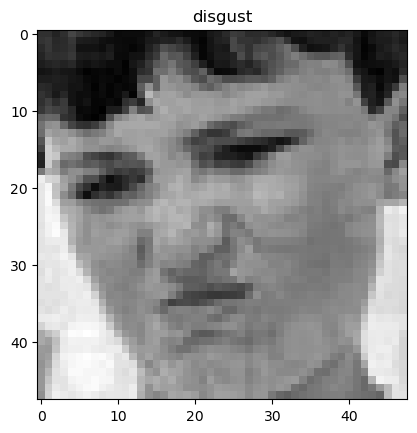

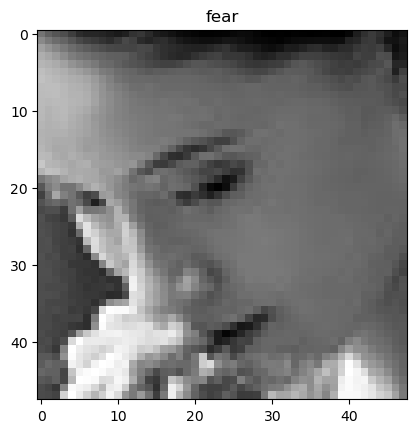

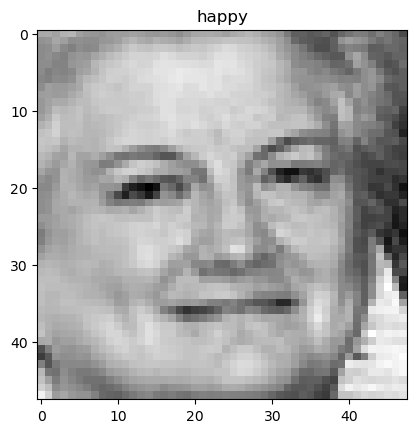

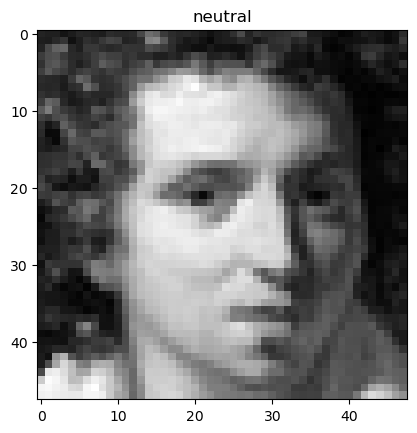

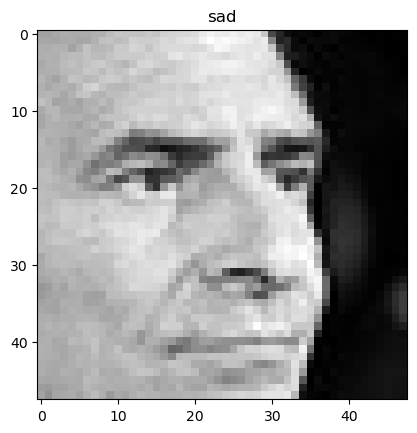

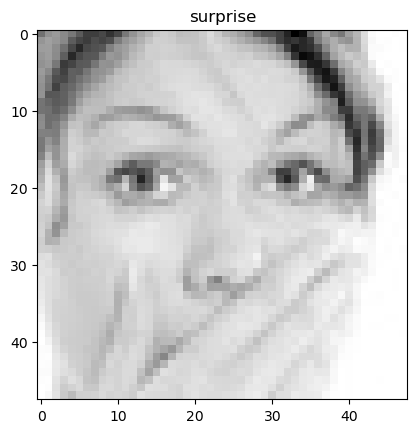

In [2]:
for root, dirs, files in os.walk('data/train/'):
    if(files):
        img = plt.imread(root + '/' + files[0])
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.title(root.replace('data/train/',''))

# Plot the bar graph for the number of images in each class for both training and testing data

In [3]:
train_images = ImageDataGenerator().flow_from_directory('data/train/')

Found 28820 images belonging to 7 classes.


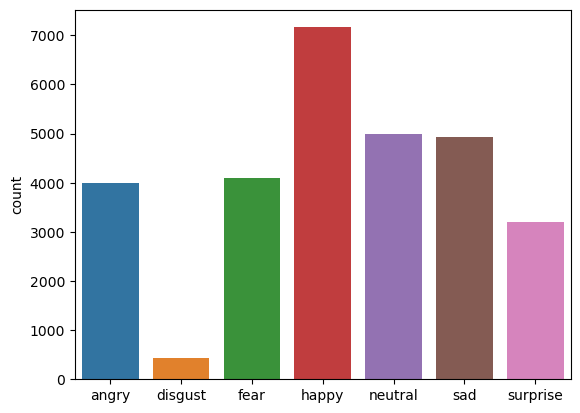

In [4]:
ax = sns.countplot(x=train_images.classes)
ax.set_xticklabels(train_images.class_indices)
plt.show()

Found 7066 images belonging to 7 classes.


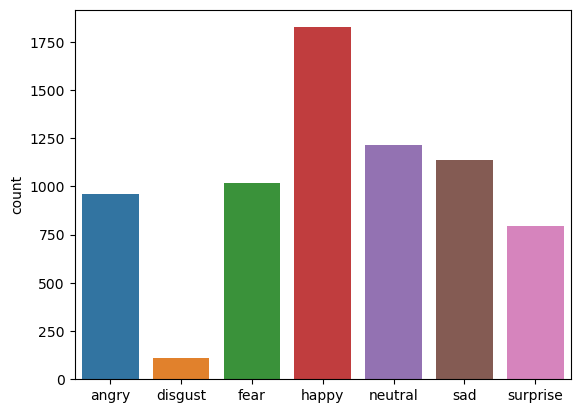

In [5]:
test_images = ImageDataGenerator().flow_from_directory('data/test/')
ax = sns.countplot(x=test_images.classes)
ax.set_xticklabels(test_images.class_indices)
plt.show()

# Data augmentation

In [6]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1/255,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory('data/train/', target_size=(48,48), batch_size=128, shuffle=True, seed=42)
train_generator_gray = train_datagen.flow_from_directory('data/train/', target_size=(48,48), batch_size=128, color_mode='grayscale', shuffle=True)

Found 28820 images belonging to 7 classes.
Found 28820 images belonging to 7 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1/255, fill_mode='nearest')

test_generator = test_datagen.flow_from_directory('data/test/', target_size=(48,48), shuffle=False)
test_generator_gray = test_datagen.flow_from_directory('data/test/', target_size=(48,48), color_mode='grayscale', shuffle=False)

Found 7066 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Build CNN

In [9]:
model = keras.models.Sequential()

model.add(layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(48,48,3)))

model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2))

model.add(layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))

model.add(layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       1

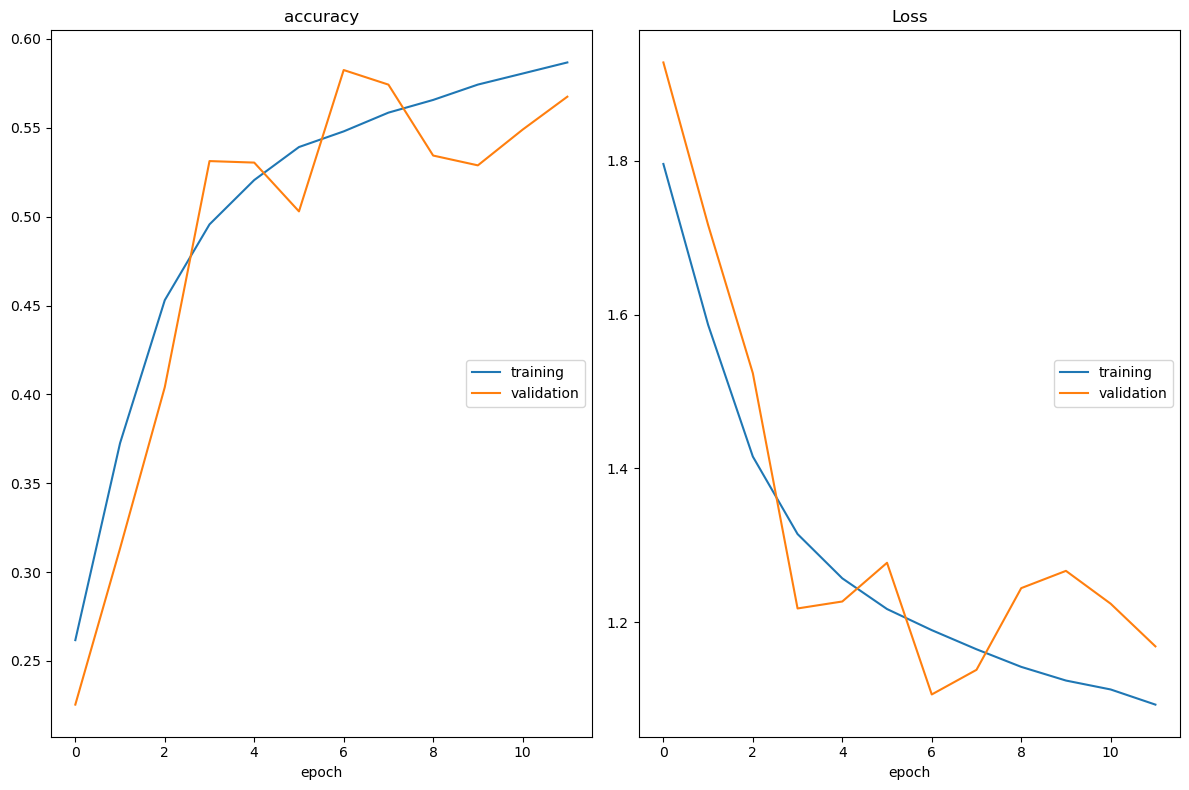

accuracy
	training         	 (min:    0.262, max:    0.587, cur:    0.587)
	validation       	 (min:    0.225, max:    0.583, cur:    0.568)
Loss
	training         	 (min:    1.093, max:    1.796, cur:    1.093)
	validation       	 (min:    1.106, max:    1.928, cur:    1.168)
226/226 [==============================] - 19s 82ms/step - loss: 1.0927 - accuracy: 0.5868 - val_loss: 1.1685 - val_accuracy: 0.5675


In [10]:
model.fit(train_generator, epochs=60, validation_data=test_generator, callbacks=[PlotLossesKerasTF(), early_stopping])

In [11]:
pred = model.predict(test_generator).argmax(axis=-1)
print(classification_report(test_generator.classes, pred))

221/221 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.51      0.47      0.49       960
           1       0.52      0.14      0.21       111
           2       0.36      0.51      0.43      1018
           3       0.65      0.92      0.76      1825
           4       0.60      0.41      0.49      1216
           5       0.58      0.21      0.31      1139
           6       0.68      0.77      0.72       797

    accuracy                           0.57      7066
   macro avg       0.56      0.49      0.49      7066
weighted avg       0.57      0.57      0.54      7066

